# Выпускная квалификационная работа 

### Автор: Петрова Екатерина Андреевна.
### Группа: ПИ19-4.
### Тема: Методы машинного обучения в задачах кредитного скоринга 

#### Импортирую все необходимые модули

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn import metrics
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

#### Считываю датасет, который я буду использовать в работе

In [2]:
df = pd.read_csv("mydata.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Перевод значений:
* Loan_ID – Идентификационный номер
* Gender – Пол
* Married – Семейное положение (замужем\женат или не замужем\не женат)
* Dependents – Иждивенцы
* Education – Образование
* Self_Employed – Самозанятость
* ApplicantIncome – Доход заемщика
* CoapplicantIncome – Доход созаемщика
* LoanAmount – Сумма кредита
* Loan_Amount_Term – Срок кредита
* Credit_History – Кредитная история
* Property_Area – Недвижимость заемщика
* Loan_Status – Статус кредита


In [3]:
df.shape #Размерность обучающего датасета

(614, 13)

#### Вывожу информацию

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### Проверяю наличие пустых значений

In [6]:
print(df.isnull().sum())

if sum(df.isnull().sum()) == 0:
    print("NAN в заданном датасете отсутствуют!")
else: 
    print("Внимание! NAN в заданном датасете присутствуют!")

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Внимание! NAN в заданном датасете присутствуют!


In [7]:
df.describe() #Описательная статистика

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.corr() #Корреляция

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


#### Заменяю значения признаков на числовые

In [3]:
df = df.replace({'Gender' : {"Male" : 0, "Female" : 1}, 
                 'Married' : {"No" : 0, "Yes" : 1},
                 'Education' : {"Not Graduate" : 0, "Graduate" : 1},
                 'Self_Employed' : {"No" : 0, "Yes" : 1},
                 'Property_Area' : {"Urban" : 0, "Rural" : 1, "Semiurban" : 2},
                 'Loan_Status' : {"Y" : 1, "N" : 0},
                 'Dependents' : {"3+" : 3, "0":0, "1":1, "2":2}
                })
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


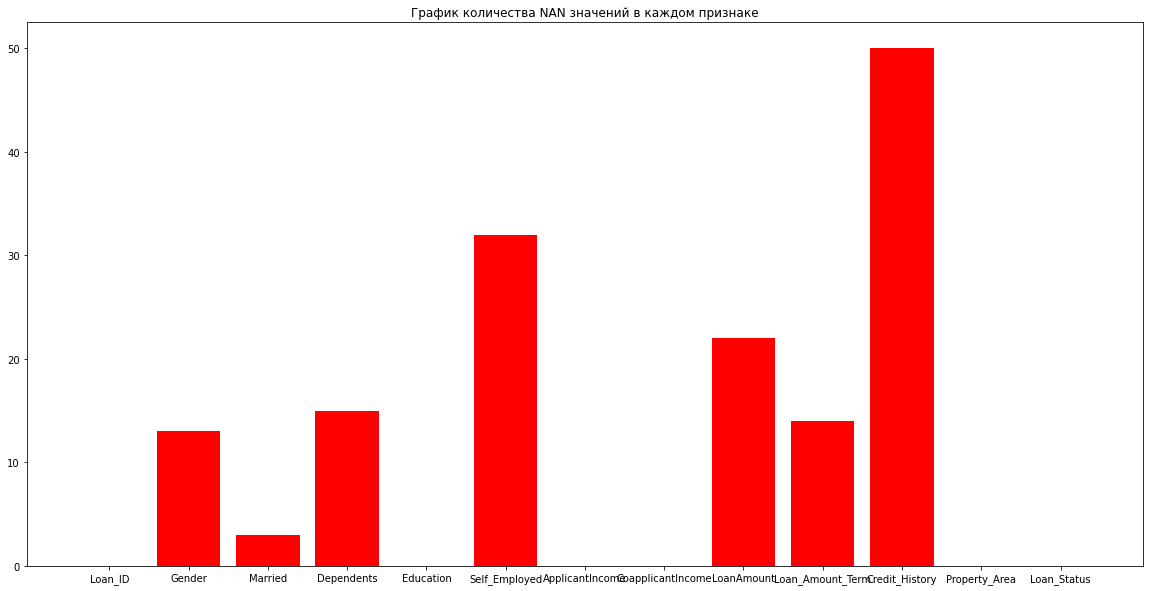

In [10]:
plt.figure(figsize=(20, 10))

data_col =  df.columns

null_values = df.isnull().sum()

plt.bar(data_col, null_values, color = "red")
plt.title("График количества NAN значений в каждом признаке");

In [4]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,120.0,360.0,1.0,0,1
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


In [29]:
print(df.isnull().sum())

if sum(df.isnull().sum()) == 0:
    print("NAN в заданном датасете отсутствуют!")
else: 
    print("Внимание! NAN в заданном датасете присутствуют!")

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
NAN в заданном датасете отсутствуют!


#### Построение корреляционной матрицы.

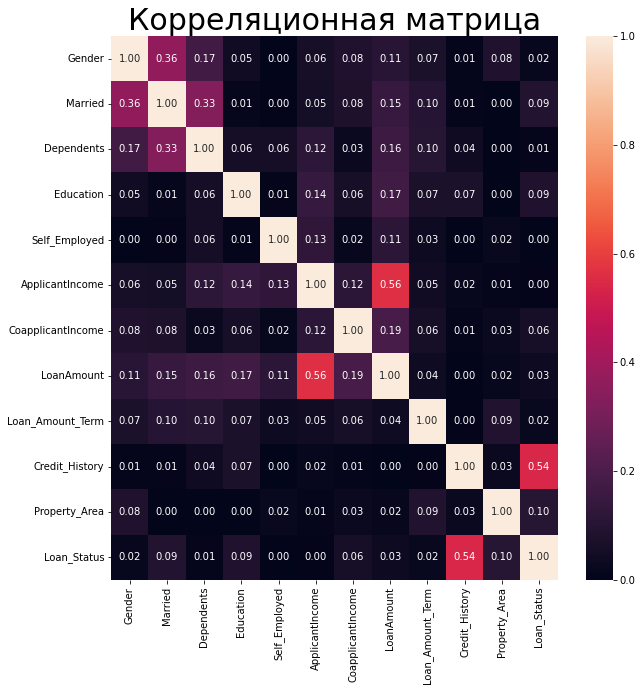

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")
plt.title('Корреляционная матрица', fontsize=30)
plt.show()

#### Удаление ненужных колонок

In [5]:
df = df.drop(columns=['Loan_ID'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,120.0,360.0,1.0,0,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


#### Построение эмпирического распределения каждого существенного признака;


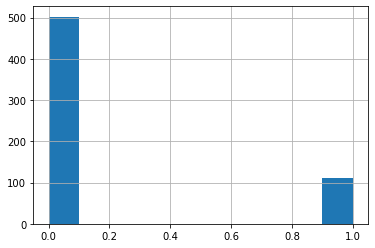

In [16]:
h = df["Gender"].hist()
fig = h.get_figure()

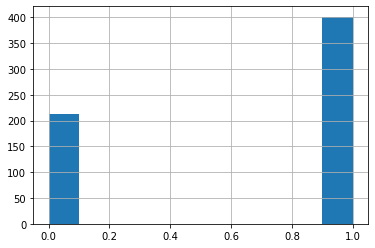

In [17]:
h = df["Married"].hist()
fig = h.get_figure()

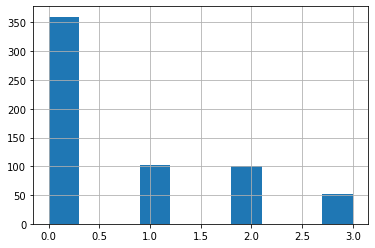

In [18]:
h = df["Dependents"].hist()
fig = h.get_figure()

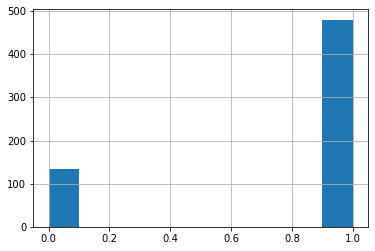

In [20]:
h = df["Education"].hist()
fig = h.get_figure() 

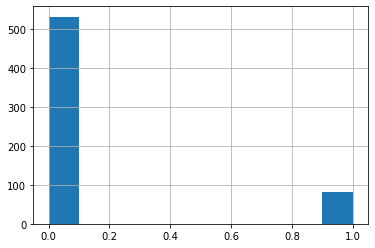

In [21]:
h = df["Self_Employed"].hist()
fig = h.get_figure()

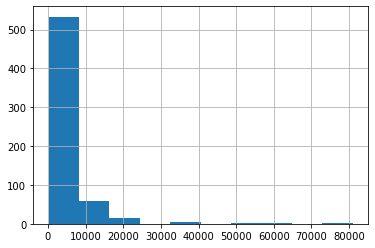

In [22]:
h = df["ApplicantIncome"].hist()
fig = h.get_figure()

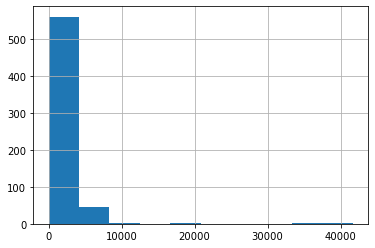

In [23]:
h = df["CoapplicantIncome"].hist()
fig = h.get_figure()

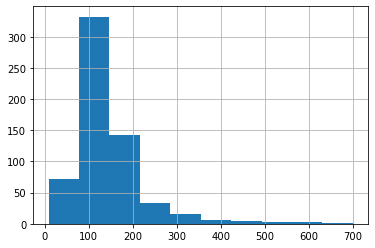

In [19]:
h = df["LoanAmount"].hist()
fig = h.get_figure()

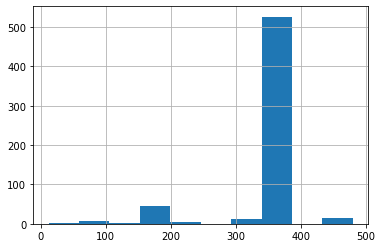

In [33]:
h = df["Loan_Amount_Term"].hist()
fig = h.get_figure()

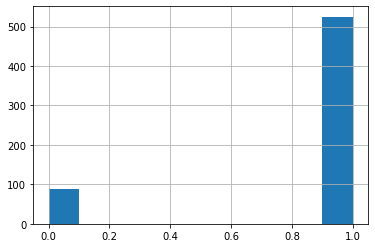

In [20]:
h = df["Credit_History"].hist()
fig = h.get_figure()

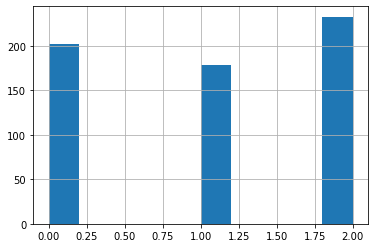

In [34]:
h = df["Property_Area"].hist()
fig = h.get_figure()

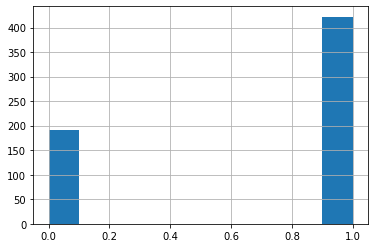

In [21]:
h = df["Loan_Status"].hist()
fig = h.get_figure()

#### Распределение целевого признака

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

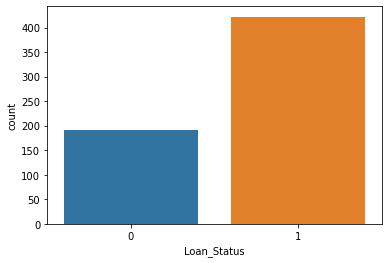

In [22]:
sns.countplot(x=df["Loan_Status"])

#### Построение совместного распределения каждого признака и целевой переменной

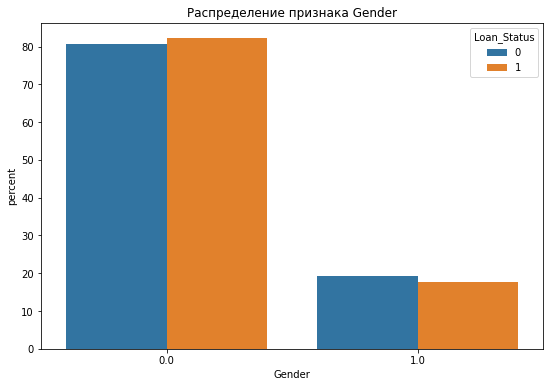

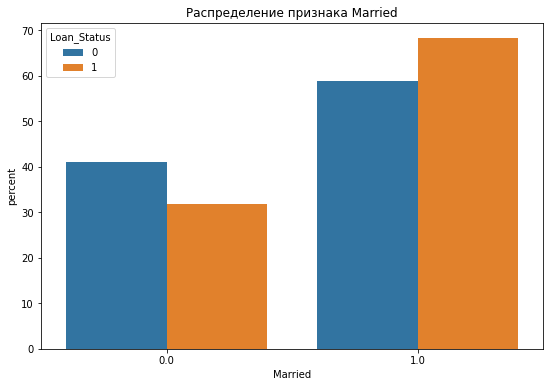

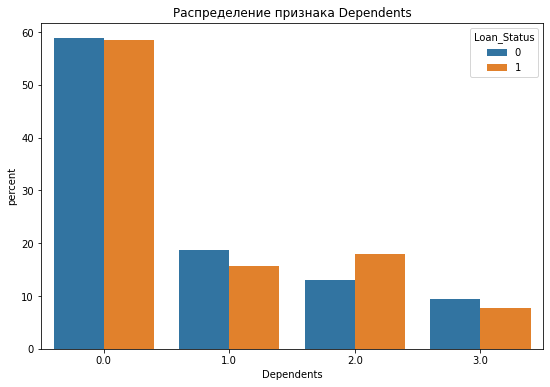

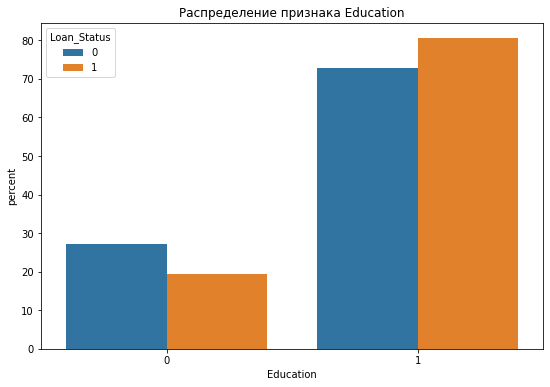

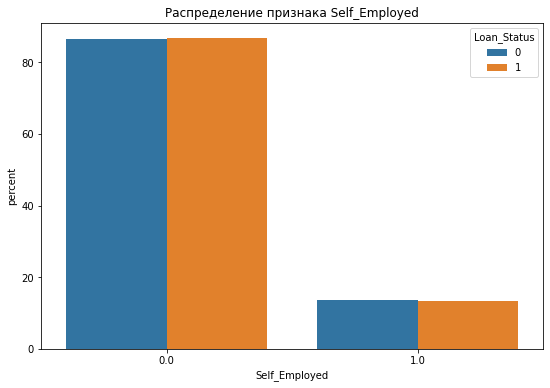

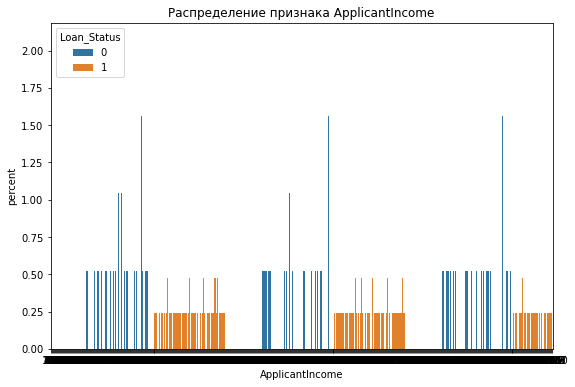

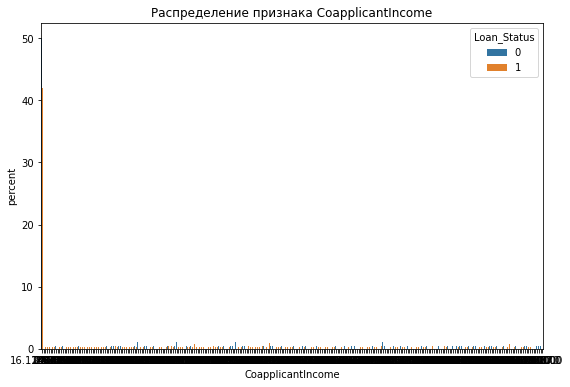

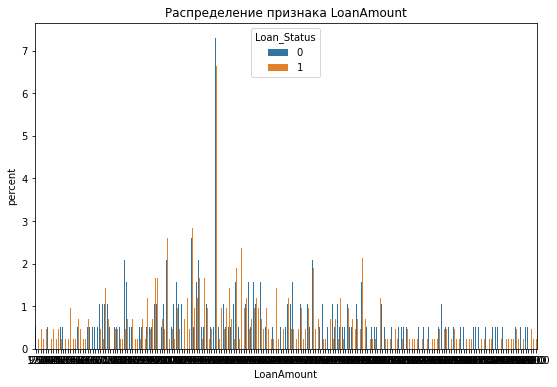

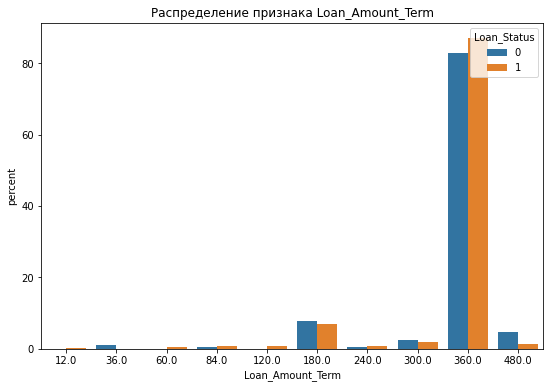

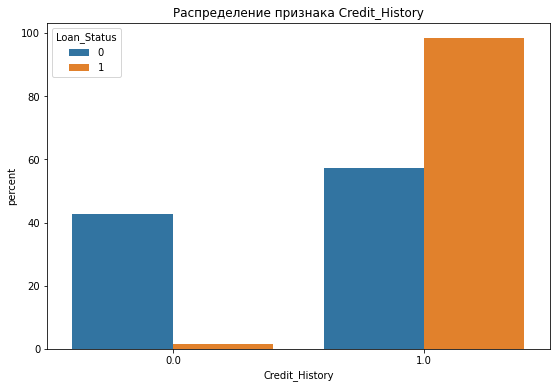

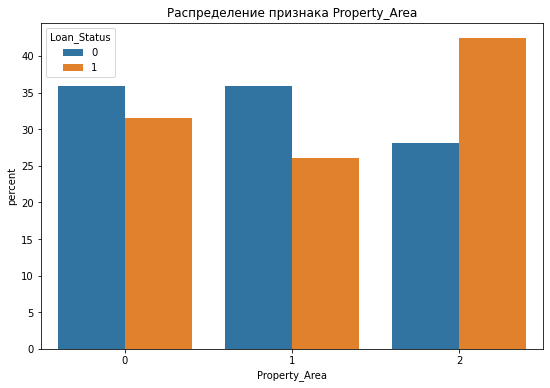

In [23]:
for col in df.columns[:11]:
    plt.figure(figsize=(9, 6))
    prop_df = df[col].groupby(df["Loan_Status"]).value_counts(normalize=True).rename("percent").reset_index()
    prop_df["percent"] *= 100
    sns.barplot(x=col, y="percent", hue="Loan_Status", data=prop_df)
    plt.title(f"Распределение признака {col}")


#### Разделяю данные на обучающую и тестовую выборки, создаю специальные функции

In [6]:
Y = df['Loan_Status']
X = df.drop(['Loan_Status'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [7]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,5849,0.0,120.0,360.0,1.0,0
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1
610,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1
611,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0
612,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0


In [26]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#### Размерности обучающей и тестовой выборки:

In [27]:
x_train.shape, y_train.shape

((491, 11), (491,))

In [28]:
x_test.shape, y_test.shape

((123, 11), (123,))

#### Функция для отображения матрицы ошибок

In [7]:
def ConfusionMatrix(y_pred):
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap="YlGnBu")

    ax.set_title('Матрица ошибок\n', fontsize = 30)
    
    ax.set_xlabel('\nПредсказанные значения', fontsize = 20)
    
    ax.set_ylabel('Реальные значения', fontsize = 20)
    
    ax.xaxis.set_ticklabels([0,1])
    
    ax.yaxis.set_ticklabels([0,1])

#### Функция для отображения метрик: 

In [8]:
def Metrics(y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')

## Начнем строить модели
# Логистическая регрессия

In [39]:
%%time 
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_prediction = logreg_model.predict(x_test)
Metrics(logreg_prediction)

Accuracy: 0.8048780487804879
Precision: 0.7830188679245284
Recall: 0.9880952380952381
F1: 0.8736842105263158
CPU times: total: 797 ms
Wall time: 258 ms


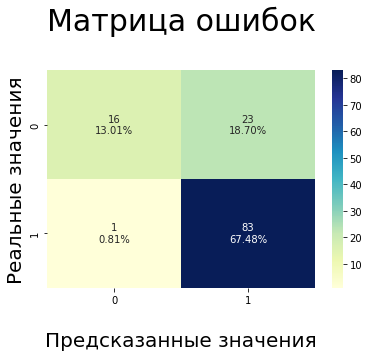

In [40]:
ConfusionMatrix(logreg_prediction)

# Метод опорных векторов (SVC)

In [37]:
%%time 
SVC_model = SVC()
SVC_model.fit(x_train, y_train)
y_pred_SVC_prediction = SVC_model.predict(x_test)
Metrics(y_pred_SVC_prediction)

Accuracy: 0.6747967479674797
Precision: 0.680327868852459
Recall: 0.9880952380952381
F1: 0.8058252427184467
CPU times: total: 31.2 ms
Wall time: 536 ms


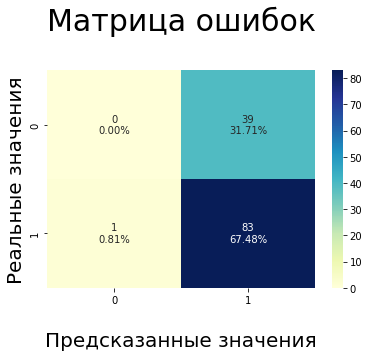

In [38]:
ConfusionMatrix(y_pred_SVC_prediction)

# Модель RidgeClassifier

In [39]:
%%time
ridge_model = RidgeClassifier(class_weight = 'balanced')
ridge_model.fit(x_train, y_train)
ridge_prediction = ridge_model.predict(x_test)
Metrics(ridge_prediction)

Accuracy: 0.7642276422764228
Precision: 0.7835051546391752
Recall: 0.9047619047619048
F1: 0.839779005524862
CPU times: total: 625 ms
Wall time: 880 ms


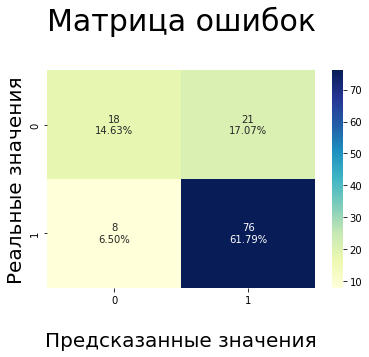

In [40]:
ConfusionMatrix(ridge_prediction)

# Метод k-ближайших соседей (KNeighborsClassifier)

In [41]:
%%time 
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)
y_pred_KNN_prediction = KNN_model.predict(x_test)
Metrics(y_pred_KNN_prediction)

Accuracy: 0.5772357723577236
Precision: 0.6568627450980392
Recall: 0.7976190476190477
F1: 0.7204301075268816
CPU times: total: 31.2 ms
Wall time: 347 ms


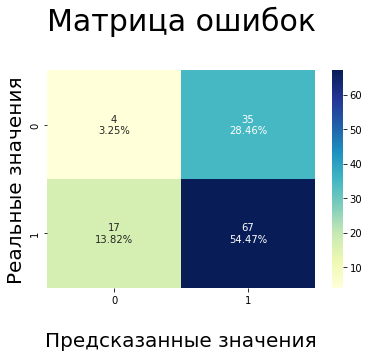

In [42]:
ConfusionMatrix(y_pred_KNN_prediction)

# Многослойный перцептрон (MLP)

In [43]:
%%time
MLP_model = MLPClassifier()
MLP_model.fit(x_train, y_train)
MLP_prediction = MLP_model.predict(x_test)
Metrics(MLP_prediction)

Accuracy: 0.6422764227642277
Precision: 0.6886792452830188
Recall: 0.8690476190476191
F1: 0.7684210526315789
CPU times: total: 922 ms
Wall time: 506 ms


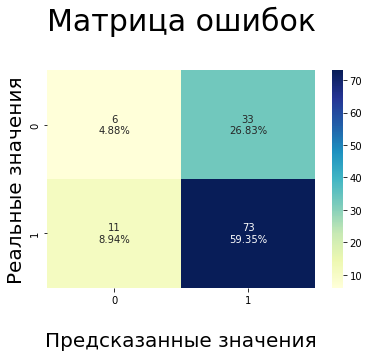

In [44]:
ConfusionMatrix(MLP_prediction)

# Дерево решений

In [45]:
%%time 
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred_tree_prediction = tree_model.predict(x_test)
Metrics(y_pred_tree_prediction)

Accuracy: 0.7642276422764228
Precision: 0.8666666666666667
Recall: 0.7738095238095238
F1: 0.8176100628930819
CPU times: total: 0 ns
Wall time: 273 ms


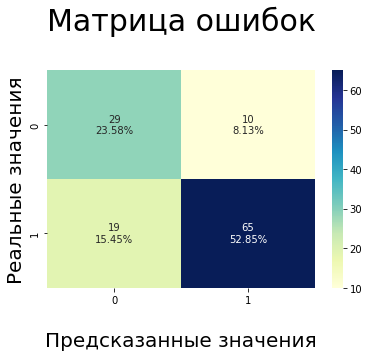

In [46]:
ConfusionMatrix(y_pred_tree_prediction)

# Случайный лес

In [47]:
%%time
forest_model = RandomForestClassifier()  
forest_model.fit(x_train, y_train)
forest_prediction = forest_model.predict(x_test)
Metrics(forest_prediction)

Accuracy: 0.7723577235772358
Precision: 0.7745098039215687
Recall: 0.9404761904761905
F1: 0.8494623655913978
CPU times: total: 172 ms
Wall time: 481 ms


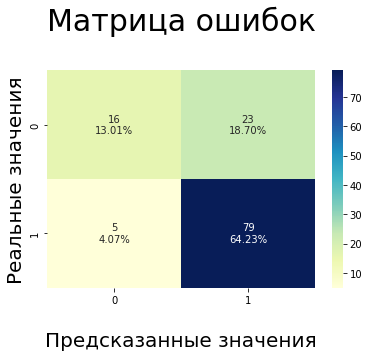

In [48]:
ConfusionMatrix(forest_prediction)

## Линейный дискриминантный  анализ

In [10]:
%%time
LDA_model = LinearDiscriminantAnalysis()  
LDA_model.fit(x_train, y_train)
LDA_prediction = LDA_model.predict(x_test)
Metrics(LDA_prediction)

Accuracy: 0.8048780487804879
Precision: 0.7830188679245284
Recall: 0.9880952380952381
F1: 0.8736842105263158
CPU times: total: 469 ms
Wall time: 1.26 s


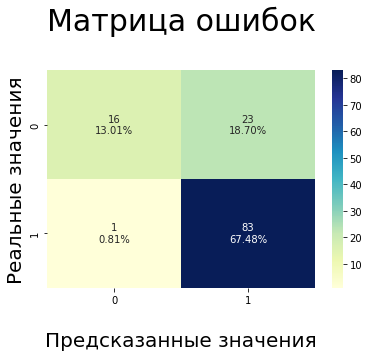

In [11]:
ConfusionMatrix(LDA_prediction)

## Наивный байесовский метод

In [12]:
%%time
MNB_model = MultinomialNB()  
MNB_model.fit(x_train, y_train)
MNB_prediction = MNB_model.predict(x_test)
Metrics(MNB_prediction)

Accuracy: 0.44715447154471544
Precision: 0.6481481481481481
Recall: 0.4166666666666667
F1: 0.5072463768115942
CPU times: total: 109 ms
Wall time: 141 ms


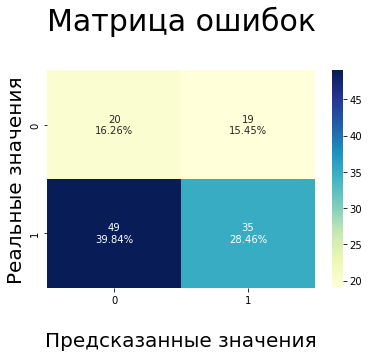

In [13]:
ConfusionMatrix(MNB_prediction)

## Стохастический градиентный спуск

In [17]:
%%time
SGC_model = SGDClassifier()  
SGC_model.fit(x_train, y_train)
SGC_prediction = SGC_model.predict(x_test)
Metrics(SGC_prediction)

Accuracy: 0.6829268292682927
Precision: 0.6829268292682927
Recall: 1.0
F1: 0.8115942028985507
CPU times: total: 62.5 ms
Wall time: 471 ms


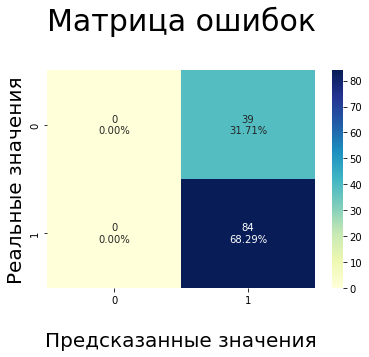

In [18]:
ConfusionMatrix(SGC_prediction)

## Градиентный бустинг

In [19]:
%%time
GB_model =  GradientBoostingClassifier()  
GB_model.fit(x_train, y_train)
GB_prediction = GB_model.predict(x_test)
Metrics(GB_prediction)

Accuracy: 0.8048780487804879
Precision: 0.8
Recall: 0.9523809523809523
F1: 0.8695652173913043
CPU times: total: 328 ms
Wall time: 479 ms


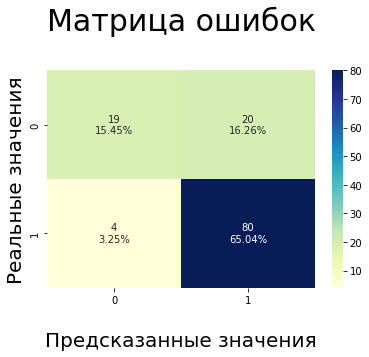

In [20]:
ConfusionMatrix(GB_prediction)

## Grid Search

## Логистическая регрессия

In [42]:
%%time
logreg_model = LogisticRegression()
parametrs = {'C': [0.0001, 0.01, 1, 10],
              "solver": ["sag", "lbfgs", "saga"], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'l1_ratio':[0.25, 0.5, 0.75]
            }
grid = GridSearchCV(logreg_model, parametrs, n_jobs = -1, scoring = 'f1')
grid.fit(x_train, y_train)
grid.best_params_

CPU times: total: 1.91 s
Wall time: 33.6 s


{'C': 0.0001, 'l1_ratio': 0.25, 'penalty': 'none', 'solver': 'lbfgs'}

In [43]:
%%time 
logreg_model = LogisticRegression(C = 0.0001, l1_ratio = 0.25)
logreg_model.fit(x_train, y_train)
logreg_prediction = logreg_model.predict(x_test)
Metrics(logreg_prediction)

Accuracy: 0.6666666666666666
Precision: 0.6776859504132231
Recall: 0.9761904761904762
F1: 0.7999999999999999
CPU times: total: 266 ms
Wall time: 82.8 ms


## Линейный дискриминантный  анализ

In [15]:
%%time
LDA_model =  LinearDiscriminantAnalysis() 
parametrs = {'solver': ['svd', 'lsqr', 'eigen'],
             'shrinkage': [None, 'auto', 0.1, 0.2, 0.3],
            }

grid = GridSearchCV(LDA_model, parametrs, n_jobs = -1, scoring = 'f1')
grid.fit(x_train, y_train)
grid.best_params_

CPU times: total: 219 ms
Wall time: 8.8 s


{'shrinkage': None, 'solver': 'svd'}

In [16]:
%%time
LDA_model =  LinearDiscriminantAnalysis(solver = 'svd', shrinkage = None)  
LDA_model.fit(x_train, y_train)
LDA_prediction = LDA_model.predict(x_test)
Metrics(LDA_prediction)

Accuracy: 0.8048780487804879
Precision: 0.7830188679245284
Recall: 0.9880952380952381
F1: 0.8736842105263158
CPU times: total: 219 ms
Wall time: 77.8 ms


## Градиентный бустинг

In [45]:
%%time
GB_model =  GradientBoostingClassifier() 
parametrs = {'loss' : ['deviance', 'exponential'], 
              'learning_rate': [0.05, 0.1, 0.25],
             'n_estimators': [50, 100, 150], 
             'max_depth': [2, 3, 4], 
             'max_features': ['auto', 'sqrt', 'log2']
            }

grid = GridSearchCV(GB_model, parametrs, n_jobs = -1, scoring = 'f1')
grid.fit(x_train, y_train)
grid.best_params_

CPU times: total: 3.62 s
Wall time: 25.9 s


{'learning_rate': 0.05,
 'loss': 'exponential',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 100}

In [49]:
%%time
GB_model =  GradientBoostingClassifier(learning_rate = 0.05, max_depth = 2, n_estimators = 100, max_features= 'auto', loss = 'exponential')  
GB_model.fit(x_train, y_train)
GB_prediction = GB_model.predict(x_test)
Metrics(GB_prediction)

Accuracy: 0.7886178861788617
Precision: 0.7788461538461539
Recall: 0.9642857142857143
F1: 0.8617021276595744
CPU times: total: 188 ms
Wall time: 359 ms
